In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, Label
from PIL import Image
import base64, io, IPython
from PIL import Image as PILImage

BASE_PATH = "../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"predict_example_01/"
os.system("mkdir -p " + OUTPUT_PATH)


# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)

print(f"Number of test samples: {test_dataset.cardinality()}")
print(metadata.features["label"].names[0])

Number of test samples: 233
cat


(-0.5, 331.5, 399.5, -0.5)

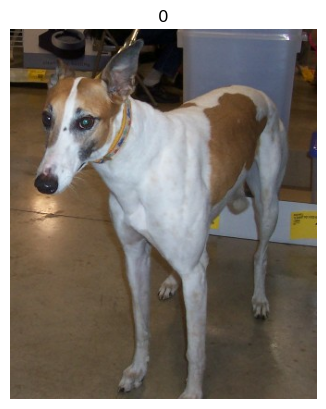

In [2]:
images=[]
alllabels=np.empty(0)
for i, (image, label) in enumerate(test_dataset.take(-1)):
    images.append(image)
    alllabels = np.append(alllabels, label.numpy().flatten())

plt.imshow(images[2])
tfds_img_buf = io.BytesIO()
plt.savefig(tfds_img_buf, format='png')
plt.title(int(label))
plt.axis("off")


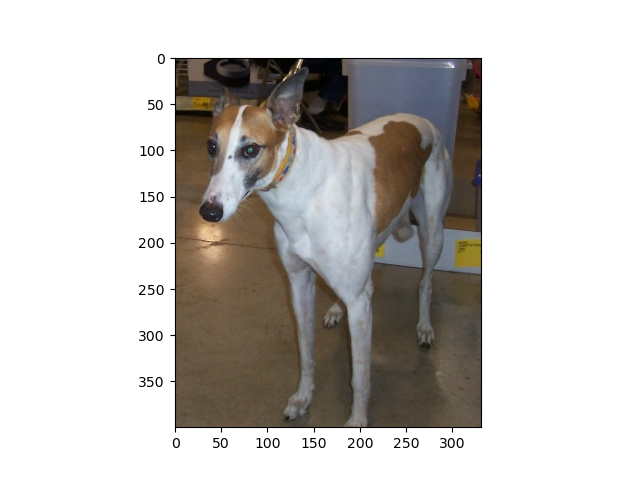

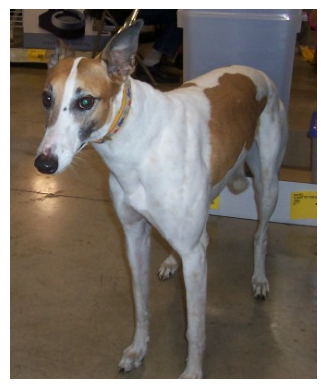

In [17]:
plt.imshow(images[2])
plt.axis("off")
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
image = Image.open(tfds_img_buf)

output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

label=1
prediction=0

html=[]
html.append('<table>')
html.append('<tr><th>Image</th> <th>Label</th> <th>Prediction</th></tr>')
html.append('<tr> <td style="width:150px">')
html.append('<img src="data:image/png;base64,{} " />'.format(encoded_string))
html.append('</td>')
html.append('<td>')
html.append(str(label)) 
html.append(" ("+metadata.features["label"].names[label]+" )") 
html.append('<td>')  
html.append('<td>')
html.append(str(prediction)) 
html.append('<td>')  
html.append('</tr></table>')

# html1='<table><tr> \
# <td> <img src="data:image/png;base64,{} "/> </td> \
# <td> <img src="puppy.jpg" alt="Drawing" style="width: 250px;"/> </td> \

myhtml = ''.join(html)
# print(myhtml)

IPython.display.HTML(myhtml)

,image,label
0,,1 (dog)
1,,0 (cat)
2,,1 (dog)
3,,1 (dog)

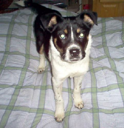
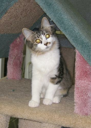
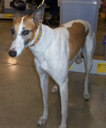
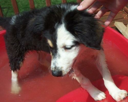

In [4]:
new_df=tfds.as_dataframe(test_dataset.take(4), metadata)
new_df

In [5]:
new_df2= pd.DataFrame(index=range(4), columns=['A'])
new_df2

,A
0,NaN
1,NaN
2,NaN
3,NaN


In [6]:
compare = pd.concat([new_df, new_df2], axis=1)
compare

,image,label,A
0,"[[[9, 0, 4], [10, 0, 5], [11, 2, 7], [13, 7, 1...",1,NaN
1,"[[[65, 86, 87], [58, 79, 80], [59, 80, 81], [7...",0,NaN
2,"[[[5, 7, 4], [5, 6, 1], [5, 4, 0], [12, 8, 0],...",1,NaN
3,"[[[42, 77, 37], [45, 80, 40], [47, 82, 42], [4...",1,NaN


In [7]:
import base64, io, IPython
from PIL import Image as PILImage

image_path='puppy.jpg'
image = PILImage.open(image_path)

output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()


html1='<table><tr> \
<td> <img src="puppy.jpg" alt="Drawing" style="width: 250px;"/> </td> \
<td> <img src="puppy.jpg" alt="Drawing" style="width: 250px;"/> </td> \
</tr></table>'